# MiniProjeto 3 - Bootstrapping

## Objetivo

O objetivo deste projeto é entender e implementar o método bootstrapping. 

Problema: a amostra abaixo representa o tempo medido de abertura do software de vendas de uma empresa em minutos.

Média: 0.5453557469230769
Desvio Padrão: 0.2547555304406469


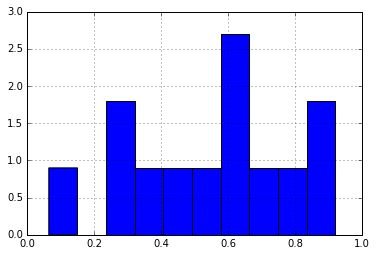

In [81]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import *
from scipy import linspace

x = [0.69689142,  0.57995802,  0.06450754,  0.61206626,  0.91976314,  0.34363861,  0.82575631,  0.41666036,  
     0.62153527,  0.56757104,  0.86683518,  0.28922458,  0.28521698]

n = len(x)

print("Média: {0}".format(np.mean(x)))
print("Desvio Padrão: {0}".format(np.std(x, ddof=1)))
pd.Series(x).hist(normed=True)

Excepcionalmente hoje, os usuários estavam reclamando de lentidão no sistema, pois ao abrir o programa demorava em média 0.68 minutos com um desvio padrão de 0.27 minutos. Usando um nível de significância de 95%, podemos afirmar que há algum problema estrutural?

Para realizar o Teste de Hipóteses, temos as premissas:

$$\bar{X}=\frac{\sum_{i=1}^nX_i}{n}$$

Onde $X_i$ é uma variável aleatória de uma distribuição **desconhecida**. Se $X_i$ fosse uma normal com apenas a variância desconhecida, deveríamos utilizar o teste T. Ou ainda, se n fosse suficientemente grande, poderíamos assumir que $\bar{X}$ é normal devido ao TLC. Porém sem as premissas anteriores, devemos utilizar um método não paramétrico para realizar inferência sobre $\bar{X}$.

Bootstrapping é um método de reamostragem com reposição que consiste em recuperar a distribuição de uma medida de interesse a partir de uma amostra mestre. Com reposição significa que um mesmo elemento pode ser selecionado várias vezes, assim como outro elemento pode não ser escolhido.

Dada uma amostra aleatória $x_1, x_2,..., x_n$ de uma população qualquer, devemos sortear consecutivamente, com reposição, conjuntos de tamanho também n dessa amostra. Aplicando a medida de interesse sobre as reamostragens, teremos uma distribuição da medida desejada. E com a distribuição, podemos calcular o intervalo de confiança através dos seus percentis.

Portanto usaremos o método de Bootstrapping para responder à pergunta acima.

Este projeto é individual.

## O que deve ser feito

1. Usando a amostra mestre acima, implementar o bootstrapping para **média** e **variância**, considerando a população desconhecida. Realizar 10000 sorteios com reposição. Usar a função choice() do numpy.
2. Gerar os histogramas das amostras obtidas acima.
3. Montar o intervalo de confiança para um nível de significância de 95% bicaudal. Responder a pergunta abaixo.
3. Para efeito de comparação, considerar X como uma variável Beta de parâmetros a=2 e b=2. Sortear 10000 amostras de tamanho n e gerar os histogramas da média e da variância amostral.
4. Comentar os resultados. Há viés (bias)? Que outras medidas posso utilizar no bootstrapping?

## Entregáveis esperados e datas

Item | Data | Descrição
---|---|---
Entrega| 17/09/2016| Notebook completo com os itens descritos acima via Blackboard.


In [82]:
sel = []

for m in range(10000):
    sel.append(np.random.choice(x, n, replace=True))


In [83]:
me = []

for i in sel:
    me.append(i.mean())
    
me

[0.5148082938461539,
 0.59592495000000001,
 0.52341826538461544,
 0.53001506769230766,
 0.66170048615384602,
 0.53059553846153851,
 0.56175559846153844,
 0.47595988923076921,
 0.48292917230769239,
 0.6091975361538462,
 0.58590147230769229,
 0.58346440153846146,
 0.35803950230769233,
 0.56716667461538461,
 0.5028515069230769,
 0.60376673461538466,
 0.43118637769230767,
 0.52610697461538469,
 0.47664714846153855,
 0.54783901384615385,
 0.56531684384615388,
 0.59442808153846149,
 0.74054037461538458,
 0.6028111546153847,
 0.49812648461538461,
 0.64358805846153844,
 0.53794307538461539,
 0.51359983384615382,
 0.58320918076923078,
 0.57315316923076931,
 0.5225390823076923,
 0.46702503230769232,
 0.63001386307692298,
 0.52537285230769237,
 0.56922596076923082,
 0.54938950692307686,
 0.53159474230769233,
 0.64909669230769229,
 0.49331826000000001,
 0.58537559461538469,
 0.5393907584615385,
 0.5643323076923078,
 0.52174287692307686,
 0.58827329538461537,
 0.51066576307692313,
 0.51155891076923

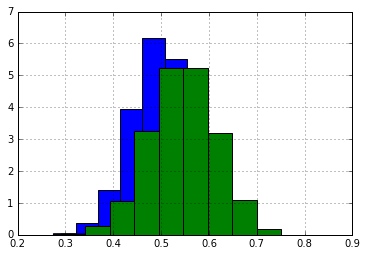

In [110]:
n = 13
matriz2 = beta.rvs(2,2, size=(10000,n))

x_barra_media=[]

for a in range(10000):
    x_barra_media.append(matriz2[a,:].mean())
    
pd.Series(x_barra_media).hist(normed=True)

pd.Series(me).hist(normed=True)

In [85]:
np.percentile(me, 2.5)

0.40987972669230766

In [86]:
np.percentile(me, 97.5)

0.67517991994230775

Os valores amostrados apresentam um problema

In [87]:
sel_var = []

for m in range(10000):
    sel_var.append(np.random.choice(x, n, replace=True))

In [88]:
me_var = []

for i in sel:
    me_var.append(i.var())
    
me_var

[0.074397293818940946,
 0.066425274777806548,
 0.037043536836111099,
 0.044264576230494283,
 0.050656249301390538,
 0.051016390026838047,
 0.037286789005054846,
 0.037687365228301066,
 0.066169297207710046,
 0.029387665646720781,
 0.067806898591672785,
 0.052499359688834575,
 0.033784797795900483,
 0.070056880630476229,
 0.074013281880496967,
 0.058356626044545355,
 0.049198935970954961,
 0.049735915939819714,
 0.029914232666403525,
 0.050359834641716415,
 0.05071150742805032,
 0.048955256040464482,
 0.032640608353128646,
 0.054466925460160423,
 0.057610585756044691,
 0.066791068669406817,
 0.11600214578660656,
 0.050064507023553965,
 0.056070196927723935,
 0.059407371663495481,
 0.046764538810867555,
 0.059029155658120662,
 0.053241939332812377,
 0.05243899163698585,
 0.042475450469846764,
 0.037792939024953794,
 0.032784538383564904,
 0.023157161312753749,
 0.052789025453696944,
 0.047305277341984531,
 0.048702995589205419,
 0.070293665642977024,
 0.02476616782474907,
 0.081662868681

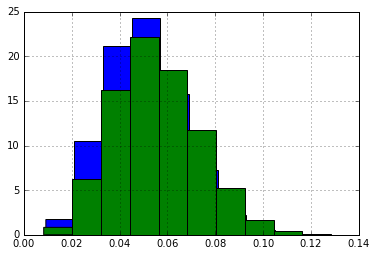

In [111]:
n = 13
matriz2 = beta.rvs(2,2, size=(10000,n))

x_barra_var=[]

for a in range(10000):
    x_barra_var.append(matriz2[a,:].var(ddof=1))
    
pd.Series(x_barra_var).hist(normed=True)

pd.Series(me_var).hist(normed=True)

In [90]:
np.percentile(me_var, 2.5)

0.025093048348740845

In [91]:
np.percentile(me_var, 97.5)

0.092867905118841146

In [92]:
variancia_amos = 0.27**2
variancia_amos

0.0729

A variancia está dentro dos padrões

In [93]:
matriz = norm.rvs(0,1, size=(10000,13))
x_barra=[]


for i in range(10000):
    x_barra.append(matriz[i,:].var())
print("variância", pd.Series(x_barra).mean())


variância 0.918940004378563


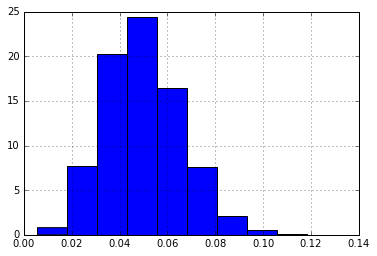

In [102]:
n = 13
matriz2 = beta.rvs(2,2, size=(10000,n))

va_am2=[]

for a in range(10000):
    va_am2.append(matriz2[a,:].var(ddof=1))
    
pd.Series(va_am2).hist(normed=True)



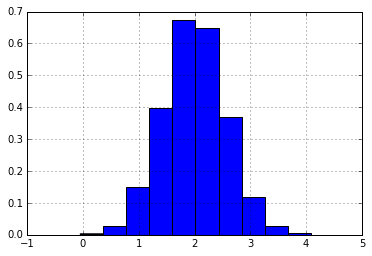

In [106]:
matriz = norm.rvs(2,2, size=(10000,n))
va=[]


for i in range(10000):
    va.append(matriz[i,:].mean())
pd.Series(va).hist(normed=True)

**5)
Existe sim um viés nas amostras, isso se dá pois os valores amostrados não representam uma população. Nossa análise, se baseia em analisar as probilidades dos valores amostrados.